In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

df = pd.read_csv("/content/drive/MyDrive/PDS/Assignment3/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Part A: Glucose Statistics from Random Sample vs Population**

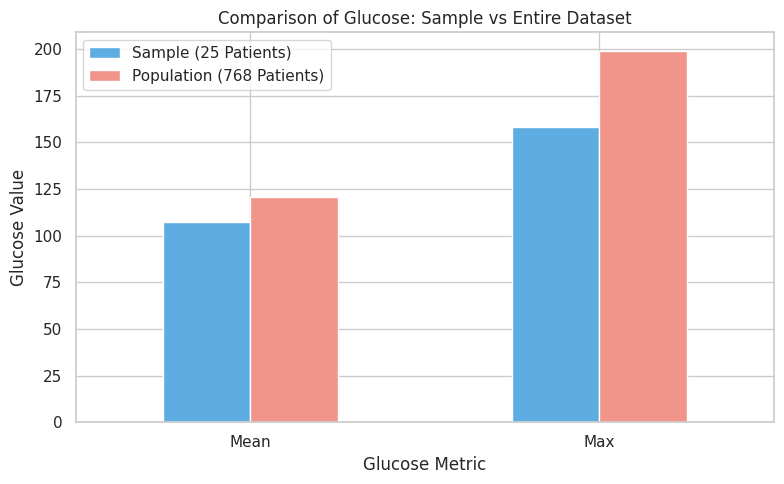

In [8]:
np.random.seed(18)
subset_25 = df.sample(n=25, random_state=18)

glucose_avg_sample = subset_25['Glucose'].mean()
glucose_peak_sample = subset_25['Glucose'].max()

glucose_avg_all = df['Glucose'].mean()
glucose_peak_all = df['Glucose'].max()

glucose_comp = pd.DataFrame({
    'Glucose Metric': ['Mean', 'Max'],
    'Sample (25 Patients)': [glucose_avg_sample, glucose_peak_sample],
    'Population (768 Patients)': [glucose_avg_all, glucose_peak_all]
})

plt.figure(figsize=(8, 5))
glucose_comp.set_index('Glucose Metric').plot(kind='bar', ax=plt.gca(), color=['#5DADE2', '#F1948A'])
plt.title("Comparison of Glucose: Sample vs Entire Dataset")
plt.ylabel("Glucose Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# **Part B: 98th Percentile of BMI**

<ipython-input-9-f63dd7961c28>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='98th Percentile BMI', data=bmi_data, palette='coolwarm')


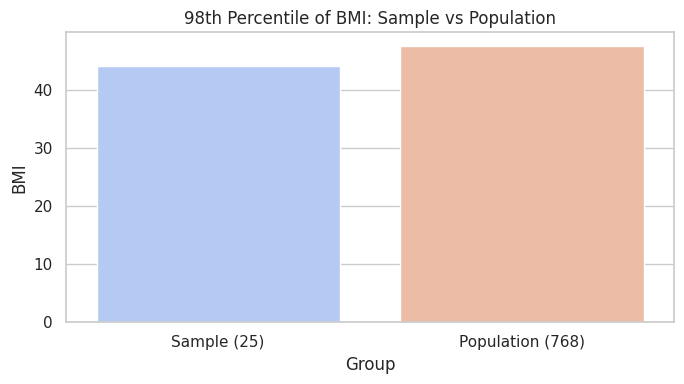

In [9]:
percentile_bmi_sample = np.percentile(subset_25['BMI'], 98)
percentile_bmi_all = np.percentile(df['BMI'], 98)

bmi_data = pd.DataFrame({
    'Group': ['Sample (25)', 'Population (768)'],
    '98th Percentile BMI': [percentile_bmi_sample, percentile_bmi_all]
})

plt.figure(figsize=(7, 4))
sns.barplot(x='Group', y='98th Percentile BMI', data=bmi_data, palette='coolwarm')
plt.title("98th Percentile of BMI: Sample vs Population")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()

# **Part C: Bootstrap Analysis for BloodPressure**

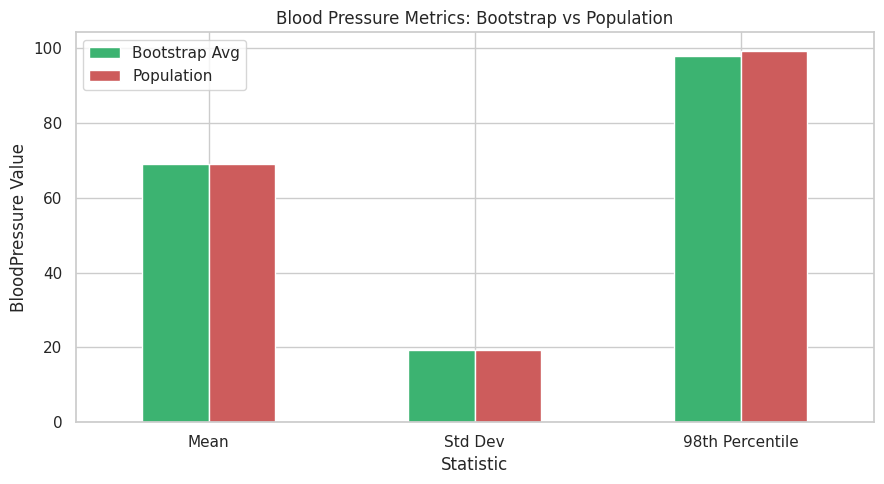

In [10]:
bp_avg_list = []
bp_std_list = []
bp_pct98_list = []

for _ in range(500):
    boot_df = df.sample(n=150, replace=True)
    bp_values = boot_df['BloodPressure']
    bp_avg_list.append(bp_values.mean())
    bp_std_list.append(bp_values.std())
    bp_pct98_list.append(np.percentile(bp_values, 98))

# Aggregate bootstrap statistics
bootstrap_stats = {
    'Mean (Bootstrap)': np.mean(bp_avg_list),
    'Std Dev (Bootstrap)': np.mean(bp_std_list),
    '98th Percentile (Bootstrap)': np.mean(bp_pct98_list)
}

# Actual population statistics
population_stats = {
    'Mean (Population)': df['BloodPressure'].mean(),
    'Std Dev (Population)': df['BloodPressure'].std(),
    '98th Percentile (Population)': np.percentile(df['BloodPressure'], 98)
}

bp_comparison = pd.DataFrame({
    'Statistic': ['Mean', 'Std Dev', '98th Percentile'],
    'Bootstrap Avg': list(bootstrap_stats.values()),
    'Population': list(population_stats.values())
})

plt.figure(figsize=(9, 5))
bp_comparison.set_index('Statistic').plot(kind='bar', ax=plt.gca(), color=['mediumseagreen', 'indianred'])
plt.title("Blood Pressure Metrics: Bootstrap vs Population")
plt.ylabel("BloodPressure Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [11]:
print("Bootstrap Statistics for BloodPressure")
print(pd.Series(bootstrap_stats))

print("\nPopulation Statistics for BloodPressure")
print(pd.Series(population_stats))

Bootstrap Statistics for BloodPressure
Mean (Bootstrap)               69.085973
Std Dev (Bootstrap)            19.247817
98th Percentile (Bootstrap)    97.928960
dtype: float64

Population Statistics for BloodPressure
Mean (Population)               69.105469
Std Dev (Population)            19.355807
98th Percentile (Population)    99.320000
dtype: float64
